In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**In this Notebook, I'll be comparing the data from the UN's GDP Per Capita with the WHO Annual Population Growth. First I began by loading the WHO data.**

In [2]:
who_Pop = pd.read_csv('../data/who_annual_pop.csv')
who_Pop.head()

,Country or Area,Year(s),Value,Value Footnotes
0,Afghanistan,2012,-2.4,NaN
1,Albania,2012,-0.3,NaN
2,Algeria,2012,-1.9,NaN
3,Andorra,2012,0.0,NaN
4,Angola,2012,-3.1,NaN


**I then cleaned up the data by removing the Value Footnotes column.**

In [3]:
who_Pop = who_Pop.drop('Value Footnotes', axis = 1)

In [4]:
who_Pop.head()

,Country or Area,Year(s),Value
0,Afghanistan,2012,-2.4
1,Albania,2012,-0.3
2,Algeria,2012,-1.9
3,Andorra,2012,0.0
4,Angola,2012,-3.1


**And changing the column names**

In [5]:
who_Pop_df = who_Pop.rename(columns = {'Country or Area' : 'Country','Year(s)' : 'Year','Value':'Pop Growth Rate' })
who_Pop_df.head()

,Country,Year,Pop Growth Rate
0,Afghanistan,2012,-2.4
1,Albania,2012,-0.3
2,Algeria,2012,-1.9
3,Andorra,2012,0.0
4,Angola,2012,-3.1


**Next, I loaded in the UN GDP Per Capita data and cleaned it up as we did in the exercise. Including removing the Value Footnotes from it as well.**

In [6]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine='python')

In [7]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country','Value':'GDP_Per_Capita' })
gdp_df.head()

,Country,Year,GDP_Per_Capita,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [8]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


**With the data cleaned, I then joined the two dataframes on the Country and Year columns.**

In [9]:
gdp_Pop = who_Pop_df.merge(gdp_df,on=['Country','Year'])
gdp_Pop.head()

,Country,Year,Pop Growth Rate,GDP_Per_Capita
0,Afghanistan,2012,-2.4,1772.764974
1,Albania,2012,-0.3,10369.561032
2,Algeria,2012,-1.9,13229.008711
3,Angola,2012,-3.1,6645.085625
4,Antigua and Barbuda,2012,-1.1,20283.897534


**I sorted them by Pop Growth Rate and GDP Per Capita in descending order to see if there was anything obvious. There wasn't.**

In [10]:
gdp_Pop.sort_values(['Pop Growth Rate','GDP_Per_Capita'],ascending=(False,False))

,Country,Year,Pop Growth Rate,GDP_Per_Capita
21,Bulgaria,2012,0.8,15772.079281
78,Latvia,2012,0.6,20864.819497
151,Ukraine,2012,0.6,8322.173034
83,Lithuania,2012,0.5,24018.818497
13,Belarus,2012,0.5,17472.324931
...,...,...,...,...
77,Kuwait,2012,-3.9,78700.458568
73,Jordan,2012,-4.0,8979.518860
133,South Sudan,2012,-4.3,1622.022720
119,Qatar,2012,-7.1,120366.280146


**I felt that just having the countries would be a lot of random data showing a bunch of nonsense, so I decided to group them in as continents by adding in and merging the continents data.**

In [11]:
continents = pd.read_csv("../data/continents.csv")

In [12]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [13]:
gdp_Pop = gdp_Pop.merge(continents,on='Country')
gdp_Pop

,Country,Year,Pop Growth Rate,GDP_Per_Capita,Continent
0,Afghanistan,2012,-2.4,1772.764974,Asia
1,Albania,2012,-0.3,10369.561032,Europe
2,Algeria,2012,-1.9,13229.008711,Africa
3,Angola,2012,-3.1,6645.085625,Africa
4,Antigua and Barbuda,2012,-1.1,20283.897534,North America
...,...,...,...,...,...
155,Uzbekistan,2012,-1.4,5821.527954,Asia
156,Vanuatu,2012,-2.0,2875.761848,Oceania
157,Yemen,2012,-2.3,3861.116716,Asia
158,Zambia,2012,-3.2,3566.382521,Africa


**I set up a Facet Grid of scatterplots so I could see the data side by side for the corresponding continents and see if there was anything interesting in the data. There wasn't really. Save for one thing; but I'll get to that later.**

<Figure size 720x360 with 0 Axes>

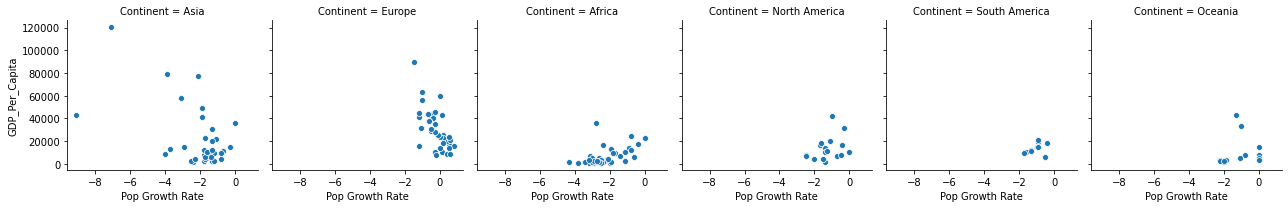

In [20]:
plt.figure(figsize = (10,5))
g = sns.FacetGrid(gdp_Pop, col = "Continent" )
g.map_dataframe(sns.scatterplot, "Pop Growth Rate", 'GDP_Per_Capita')
plt.show()

**I created variables in order to combine each of the continents into a single scatterplot chart.**

In [15]:
gdp_Pop_Na = gdp_Pop[gdp_Pop['Continent']=='North America']
gdp_Pop_Asia = gdp_Pop[gdp_Pop['Continent']=='Asia']
gdp_Pop_Europe = gdp_Pop[gdp_Pop['Continent']=='Europe']
gdp_Pop_Africa = gdp_Pop[gdp_Pop['Continent']=='Africa']
gdp_Pop_Sa = gdp_Pop[gdp_Pop['Continent']=='South America']
gdp_Pop_Ocean = gdp_Pop[gdp_Pop['Continent']=='Oceanica']

**You may note that below the data is limited to 2012 only. That's because the WHO data was for the year 2012 only making finding a trend nearly impossible. That came as a fun surprise**

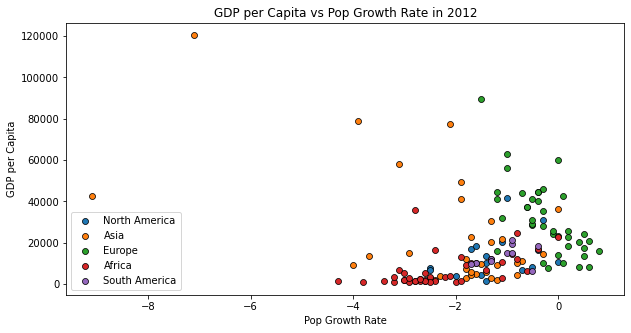

In [19]:
plt.figure(figsize = (10,5))
sns.scatterplot(gdp_Pop_Na['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="North America"
                , edgecolor = 'black')
sns.scatterplot(gdp_Pop_Asia['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="Asia"
                , edgecolor = 'black')
sns.scatterplot(gdp_Pop_Europe['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="Europe"
                , edgecolor = 'black')
sns.scatterplot(gdp_Pop_Africa['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="Africa"
                , edgecolor = 'black')
sns.scatterplot(gdp_Pop_Sa['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="South America"
                , edgecolor = 'black')
sns.scatterplot(gdp_Pop_Ocean['Pop Growth Rate'],gdp_Pop['GDP_Per_Capita'],label="Oceanica"
                , edgecolor = 'black')
plt.xlabel('Pop Growth Rate')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita vs Pop Growth Rate in 2012')
plt.legend(loc="lower left",prop={"size":10});

**As you can see, there is absolutely no correlation between GDP per Capita and Population Growth Rate. This isn't entirely surprising, but what was surprising was how few countries in 2012 were experiencing a positive population growth rate.**

**Without additional data for other years, I can't say if this is a trend, but it'd be something worth exploring as the convential wisdom seems to be the population is constantly increasing. This one year may have been an outlier, or it may be part of a trend. If I were to continue this, I'd drop the GDP Per Capita entirely, and look into that.**